# Lab 8: Define and Solve an ML Problem of Your Choosing

In [43]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [44]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the bookReviewsData.csv dataset for this project.
2. I will be predicting whether a book review is positive or not. The label is the Positive Review column, which is a boolean value (True for positive, False for negative).
3. This is a supervised learning problem because we are working with labeled data. It is a binary classification problem since there are only two possible outcomes: positive or negative.
4. My main feature is the text of the review itself. I also created a new feature called review_length, which captures the number of characters in each review. After preprocessing, I plan to use TF-IDF to turn the text into numerical features for the model.
5. This is an important problem because companies often receive a lot of customer feedback, and having a model that can automatically identify positive vs. negative reviews can save time and help teams focus on areas that need improvement. It can also help track product satisfaction trends or monitor customer sentiment at scale.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [45]:
"""
To better understand my data, I started by checking for missing values, but there were none.
I also found 108 duplicate rows, which I plan to remove to improve data quality.
I then looked at the class distribution in the Positive Review column and found that the dataset is fairly balanced between positive and negative reviews, so I don’t need to apply resampling techniques.

I created a new feature called review_length, which counts the number of characters in each review. 
This helped me see that review lengths vary widely, some are extremely short and others are very long, which might affect how the model learns.
I visualized the distribution using a histogram to better understand the overall spread.

Because this is a natural language processing (NLP) problem, the main feature (the text itself) needs to be converted into numerical form.
I used TfidfVectorizer to transform the text into features that can be used for machine learning. 
This method was covered in the course and helps by emphasizing words that are unique and meaningful to each review.

For my model, I plan to start with Logistic Regression since it’s simple and works well with high-dimensional text data.
I may also try a Naive Bayes classifier, which is known to perform well on text classification tasks.

I don’t think I need to scale my data because TF-IDF already handles feature weighting.
To evaluate my model, I will use accuracy, precision, and recall since those are standard metrics for binary classification.
If needed, I’ll use techniques like changing TF-IDF settings (e.g. n-grams or max_features) or testing different models to improve performance.

I also checked for the shortest and longest reviews. 
There weren’t any reviews with fewer than 30 characters, which suggests that most entries are reasonably complete. 
Some of the longest reviews had over 1,500 characters and contained in-depth reflections. 
This might impact the model since longer reviews tend to contain more sentiment-rich words, which could influence how the TF-IDF weights the terms.
"""

'\nTo better understand my data, I started by checking for missing values, but there were none.\nI also found 108 duplicate rows, which I plan to remove to improve data quality.\nI then looked at the class distribution in the Positive Review column and found that the dataset is fairly balanced between positive and negative reviews, so I don’t need to apply resampling techniques.\n\nI created a new feature called review_length, which counts the number of characters in each review. \nThis helped me see that review lengths vary widely, some are extremely short and others are very long, which might affect how the model learns.\nI visualized the distribution using a histogram to better understand the overall spread.\n\nBecause this is a natural language processing (NLP) problem, the main feature (the text itself) needs to be converted into numerical form.\nI used TfidfVectorizer to transform the text into features that can be used for machine learning. \nThis method was covered in the cours

In [46]:
# loading and inspecting data
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(bookReviewDataSet_filename)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True


In [47]:
# checking for missing and duplicate values
df.isnull().sum()
df.duplicated().sum()

108

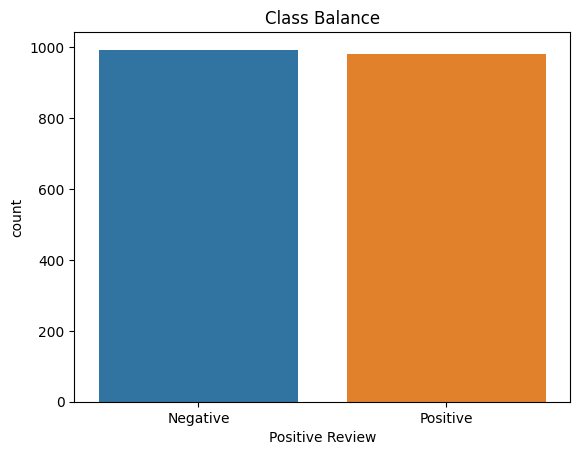

False    0.503294
True     0.496706
Name: Positive Review, dtype: float64

In [48]:
# visualizing class balance
sns.countplot(data=df, x='Positive Review')
plt.title('Class Balance')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

df['Positive Review'].value_counts(normalize=True)


In [49]:
# analyzing review lengths
df['review_length'] = df['Review'].apply(len)
print(df['review_length'].describe())


count     1973.000000
mean       933.336036
std       1450.187183
min         59.000000
25%        331.000000
50%        586.000000
75%       1065.000000
max      32467.000000
Name: review_length, dtype: float64


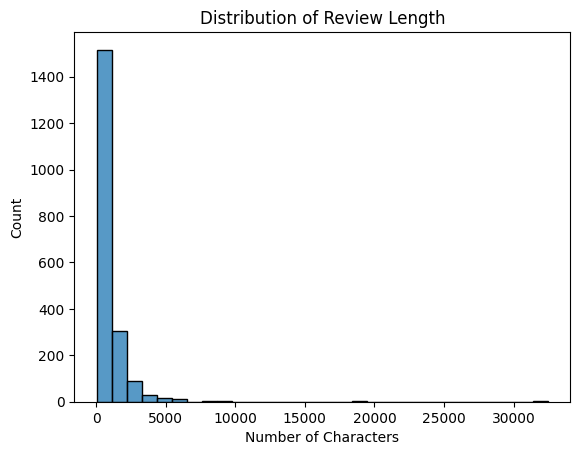

In [50]:
# plot distribution of reivew lengths
sns.histplot(df['review_length'], bins=30)
plt.title('Distribution of Review Length')
plt.xlabel('Number of Characters')
plt.show()


In [51]:
# shortest vs longest reviews
print("Shortest reviews:")
print(df[df['review_length'] < 30]['Review'].head())

print("\nLongest reviews:")
print(df[df['review_length'] > 1500]['Review'].head())


Shortest reviews:
Series([], Name: Review, dtype: object)

Longest reviews:
4     We have now entered a second time of deep conc...
16    If you like this book you will probably like "...
23    ``People  say again and again that philosop...
29    Harvey E. Goldberg is one of the pioneering so...
30    "The number" poses an interesting question but...
Name: Review, dtype: object


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. After inspecting the data, I decided to keep the Review text as my main feature and Positive Review as the label. I also created a new feature called review_length to help analyze patterns, but I don’t plan to use it in the final model since it doesn’t capture the actual content or sentiment. I removed any duplicated rows and verified that there were no missing values, so no imputation was needed.
2. Since this is a text classification task, I’ll use TF-IDF vectorization to convert the reviews into numerical features. I already checked for class imbalance and found that the positive and negative classes are almost balanced, so I don’t need to oversample or undersample. I also plan to clean the text further by lowercasing it and removing punctuation or stopwords if needed.
3. I plan to start with a logistic regression model since it works well for binary classification and is easy to interpret. If I have time, I might also try out a decision tree or random forest model to compare results.
4. I’ll split the data into training and test sets using an 80/20 ratio. I’ll fit the logistic regression model on the training data using the TF-IDF features, and then evaluate it on the test set using accuracy, precision, recall, and F1-score. If the performance isn’t good enough, I’ll tune the TF-IDF parameters (like max features or stop word removal) and try different models to see what performs best.



## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [53]:
# TF-IDF Vectorization + Train-Test Split
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['Review'])

# labels
y = df['Positive Review']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# training logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
# predictions
y_pred = model.predict(X_test)

# evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7974683544303798

Confusion Matrix:
 [[151  44]
 [ 36 164]]

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.77      0.79       195
        True       0.79      0.82      0.80       200

    accuracy                           0.80       395
   macro avg       0.80      0.80      0.80       395
weighted avg       0.80      0.80      0.80       395



In [56]:
"""
Based on the evaluation metrics, I’ll decide if the model is performing well enough. 
If needed, I’ll try adjusting the max_features value in TF-IDF, use bigrams, or test other models like Naive Bayes. 
But so far, logistic regression seems like a solid starting point.

"""


'\nBased on the evaluation metrics, I’ll decide if the model is performing well enough. \nIf needed, I’ll try adjusting the max_features value in TF-IDF, use bigrams, or test other models like Naive Bayes. \nBut so far, logistic regression seems like a solid starting point.\n\n'